In [17]:
# import modules
import xml.etree.ElementTree as ET
import pandas as pd
import sys
import string
import re
import nltk
import sys
import os
import gensim

# Add the src directory to sys.path
sys.path.append(os.path.abspath(r'C:\dev\NLP2RE_Sandbox\src'))

print(sys.version)
print(sys.executable)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
c:\ProgramData\anaconda3\python.exe


In [18]:
# Specify the path to your XML file and namespace
xml_file_path = r'C:\dev\NLP2RE_Sandbox\data\work_data\2007-ertms.xml'
namespace = {'ns': 'req_document.xsd'}

In [19]:
# Parse .xml to df
from utils import parse_xml

# import utils.ParseXML as ParseXML
df = parse_xml.process_xml_with_namespace(xml_file_path, namespace)
df.tail(10)

,tag,text,id,path
621,meaning,Transmission of ETCS information from a train ...,,req_document/p/glossary/glossary_item/meaning
622,term,Train trip,,req_document/p/glossary/glossary_item/term
623,meaning,"Is used when a train passes a ""danger"" signal,...",,req_document/p/glossary/glossary_item/meaning
624,term,Warning,,req_document/p/glossary/glossary_item/term
625,meaning,Audible and/or visual indication to alert the ...,,req_document/p/glossary/glossary_item/meaning
626,term,Wheelslip,,req_document/p/glossary/glossary_item/term
627,meaning,When a traction-driven wheel loses adhesion wi...,,req_document/p/glossary/glossary_item/meaning
628,term,Wheelslide,,req_document/p/glossary/glossary_item/term
629,meaning,When a braked wheel loses adhesion with the ra...,,req_document/p/glossary/glossary_item/meaning
630,title,Other technical functions,11,req_document/p/title


In [20]:
# Create 'text_clean' attribute in df (list of tokens)
from utils import clean_data

df['text_clean'] = df['text'].apply(lambda x: clean_data.data_preparation(x))

df.head()

,tag,text,id,path,text_clean
0,title,ERTMS/ETCS Functional Requirements Specificati...,,req_document/title,"[ERTMS, ETCS, Functional, Requirements, Specif..."
1,version,5.00,,req_document/version,"[5, 00]"
2,issue_date,2007-06-21,,req_document/issue_date,"[2007, 06, 21]"
3,file_number,ERA/ERTMS/003204,,req_document/file_number,"[ERA, ERTMS, 003204]"
4,change_date,2007-06-21,,req_document/change_log/change_log_item/change...,"[2007, 06, 21]"


In [21]:
# Create a corpus
# clean_text = clean_data.df_tokenize(df['text_clean'], 2)
clean_text = df['text_clean']


In [22]:
 # Create a Dictionary: Associate each word in the corpus with a unique integer ID
from gensim import corpora

dictionary = corpora.Dictionary(clean_text)

2024-07-28 00:35:35,370 - INFO - adding document #0 to Dictionary<0 unique tokens: []>
2024-07-28 00:35:35,372 - INFO - built Dictionary<1069 unique tokens: ['ERTMS', 'ETCS', 'FRS', 'Functional', 'Requirements']...> from 432 documents (total 6615 corpus positions)
2024-07-28 00:35:35,388 - DEBUG - starting a new internal lifecycle event log for Dictionary
2024-07-28 00:35:35,388 - INFO - Dictionary lifecycle event {'msg': "built Dictionary<1069 unique tokens: ['ERTMS', 'ETCS', 'FRS', 'Functional', 'Requirements']...> from 432 documents (total 6615 corpus positions)", 'datetime': '2024-07-28T00:35:35.388590', 'gensim': '4.3.0', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'created'}


In [23]:
# Convert document into the bag-of-words (BoW) format

bow = [dictionary.doc2bow(text) for text in clean_text]

In [24]:
num_topics = 60

In [25]:
# Train the model on the corpus.
lda_model = gensim.models.ldamodel.LdaModel(bow, num_topics=num_topics, id2word=dictionary)
topics = lda_model.print_topics()

# Print topics with words instead of IDs
for topic in topics:
    print(topic)

2024-07-28 00:35:35,436 - INFO - using symmetric alpha at 0.016666666666666666
2024-07-28 00:35:35,436 - INFO - using symmetric eta at 0.016666666666666666
2024-07-28 00:35:35,436 - INFO - using serial LDA version on this node
2024-07-28 00:35:35,453 - INFO - running online (single-pass) LDA training, 60 topics, 1 passes over the supplied corpus of 432 documents, updating model once every 432 documents, evaluating perplexity every 432 documents, iterating 50x with a convergence threshold of 0.001000
2024-07-28 00:35:35,453 - WARNING - too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-07-28 00:35:35,469 - DEBUG - bound: at document #0
2024-07-28 00:35:35,838 - INFO - -34.885 per-word bound, 31738048389.1 perplexity estimate based on a held-out corpus of 432 documents with 6615 words
2024-07-28 00:35:35,838 - INFO - PROGRESS: pass 0, at document #432/432
2024-07-28 00:35:35,838 - DEBUG - performing inference on a

(2, '0.025*"train" + 0.020*"to" + 0.019*"Level" + 0.017*"onboard" + 0.017*"be" + 0.016*"system" + 0.015*"by" + 0.015*"provided" + 0.014*"is" + 0.014*"shall"')
(9, '0.052*"the" + 0.042*"and" + 0.038*"train" + 0.036*"of" + 0.033*"" + 0.024*"The" + 0.022*"shall" + 0.020*"for" + 0.020*"Train" + 0.020*"speed"')
(57, '0.057*"train" + 0.033*"The" + 0.032*"shall" + 0.026*"of" + 0.026*"national" + 0.026*"existing" + 0.026*"" + 0.026*"account" + 0.026*"systems" + 0.026*"calculation"')
(33, '0.048*"train" + 0.046*"to" + 0.027*"" + 0.023*"or" + 0.021*"information" + 0.020*"for" + 0.020*"ETCS" + 0.019*"a" + 0.018*"transmission" + 0.017*"shall"')
(35, '0.064*"the" + 0.049*"" + 0.030*"a" + 0.030*"shall" + 0.026*"is" + 0.023*"driver" + 0.023*"to" + 0.023*"ETCS" + 0.022*"trainborne" + 0.019*"be"')
(39, '0.088*"the" + 0.043*"operation" + 0.040*"of" + 0.031*"train" + 0.027*"shall" + 0.021*"The" + 0.021*"be" + 0.019*"" + 0.015*"a" + 0.012*"and"')
(46, '0.057*"train" + 0.042*"track" + 0.042*"and" + 0.035*"

In [26]:
# Get the topic distributions for each document
corpus_lda = lda_model[bow]


In [27]:
from gensim import corpora, models, similarities
from gensim.models import LsiModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


# Create a matrix where each row will correspond to the topic distribution of a document
topic_matrix = []
for doc in corpus_lda:
    # Convert the topic distribution to a dense vector
    vector = [0] * lda_model.num_topics
    for topic, value in doc:
        vector[topic] = value        
    topic_matrix.append(vector)


# Convert list to numpy array for easy computation
topic_matrix = np.array(topic_matrix)
print("\n topic_matrix")    
print(topic_matrix)    



 topic_matrix
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.01666667 0.01666667 0.01666667 ... 0.01666667 0.01666667 0.01666667]
 ...
 [0.01666667 0.01666667 0.01666667 ... 0.01666667 0.01666667 0.01666667]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [28]:
# Compute cosine similarity between all pairs of documents
similarity_matrix = cosine_similarity(topic_matrix)
print(similarity_matrix)

[[1.         0.         0.12909944 ... 0.12909944 0.         0.        ]
 [0.         1.         0.12909944 ... 0.12909944 0.         0.        ]
 [0.12909944 0.12909944 1.         ... 1.         0.16609199 0.18257419]
 ...
 [0.12909944 0.12909944 1.         ... 1.         0.16609199 0.18257419]
 [0.         0.         0.16609199 ... 0.16609199 1.         0.        ]
 [0.         0.         0.18257419 ... 0.18257419 0.         1.        ]]


## Analyze the Distance
### Measures the cosine distance between topics, with higher distance indicating more distinct topics.

Now you can analyze the distances (or similarities) between the topic distributions:

The similarity_matrix will give you the pairwise cosine similarities between the documents based on their LDA topic distributions. You can convert these similarities into distances if needed (e.g., distance = 1 - similarity).

This process allows you to calculate and analyze the LDA topic distances using Gensim in Python.

In [29]:
# Convert the similarity matrix to a distance matrix
distance_matrix = 1 - similarity_matrix

# Output the distance matrix
print("Distance Matrix for documents:")
print(distance_matrix)

Distance Matrix for documents:
[[ 0.00000000e+00  1.00000000e+00  8.70900555e-01 ...  8.70900555e-01
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  8.70900555e-01 ...  8.70900555e-01
   1.00000000e+00  1.00000000e+00]
 [ 8.70900555e-01  8.70900555e-01 -1.33226763e-15 ... -1.33226763e-15
   8.33908012e-01  8.17425815e-01]
 ...
 [ 8.70900555e-01  8.70900555e-01 -1.33226763e-15 ... -1.33226763e-15
   8.33908012e-01  8.17425815e-01]
 [ 1.00000000e+00  1.00000000e+00  8.33908012e-01 ...  8.33908012e-01
   0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  8.17425815e-01 ...  8.17425815e-01
   1.00000000e+00  0.00000000e+00]]


# Inter-topic Distance Visualization

Creating inter-topic distance maps helps in visualizing the distance between topics. This can be done using tools like t-SNE (t-distributed Stochastic Neighbor Embedding) or multidimensional scaling (MDS) to project high-dimensional topic vectors into a 2D or 3D space. A well-separated set of topics indicates that the LDA model has generated distinct topics.


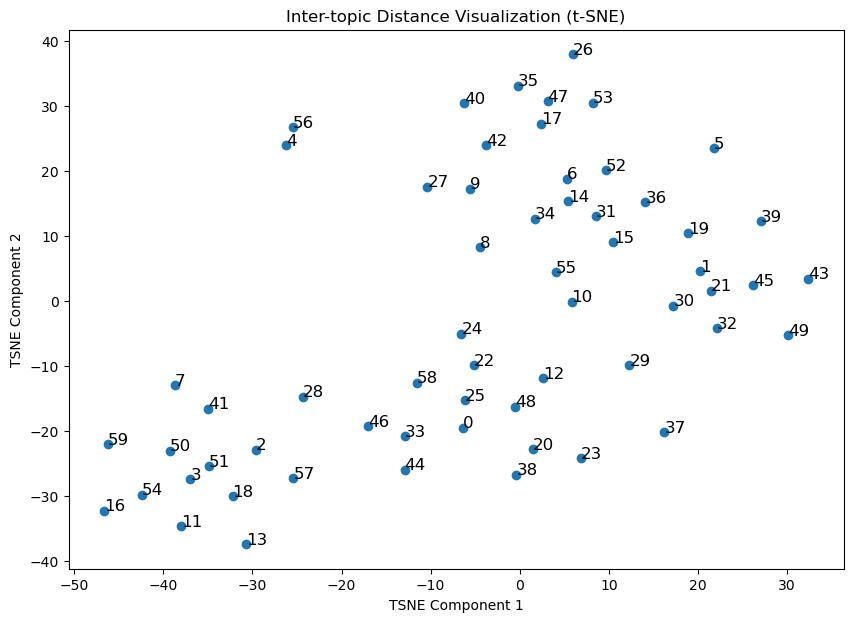

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim import corpora
from gensim.models import LdaModel
from sklearn.metrics.pairwise import cosine_distances

# Assuming lda_model and dictionary have already been created

# Extract topic vectors
topic_vectors = []
for topic_id in range(lda_model.num_topics):
    topic_terms = lda_model.get_topic_terms(topic_id, topn=len(dictionary))
    topic_vector = np.zeros(len(dictionary))
    for term_id, value in topic_terms:
        topic_vector[term_id] = value
    topic_vectors.append(topic_vector)

topic_vectors = np.array(topic_vectors)

# Compute pairwise cosine distances
topic_distance_matrix = cosine_distances(topic_vectors)

# Visualize the distances indirectly using t-SNE embeddings
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_embedding = tsne.fit_transform(topic_vectors)

# Compute pairwise distances between t-SNE embeddings
tsne_distance_matrix = cosine_distances(tsne_embedding)

# Plot t-SNE embeddings with distances based on transformed coordinates
plt.figure(figsize=(10, 7))
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1])

for i, (x, y) in enumerate(tsne_embedding):
    plt.text(x, y, str(i), fontsize=12)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('Inter-topic Distance Visualization (t-SNE)')
plt.show()



## Average Topic Coherence:
Topic coherence measures the semantic similarity between the high-probability words in a topic. By computing the pairwise distances (e.g., cosine distance) between the word vectors in a topic, you can assess how coherent each topic is. Topics with high coherence scores indicate that the words within the topic are closely related in meaning, which suggests a well-performing LDA model.

To compute topic coherence scores in Python, particularly using Gensim, you can follow these steps. 

1. Extract Topic Terms: Retrieve the top words for each topic from the LDA model.
2. Build Word Embeddings: Use a pre-trained word embedding model (like Word2Vec or FastText) to represent each word as a dense vector.
3. Compute Pairwise Word Similarities: Calculate pairwise similarities (e.g., cosine similarity) between all word vectors within each topic.
4. Aggregate and Compute Coherence Score: Average these pairwise similarities to get a coherence score for each topic. Higher scores indicate more coherent topics.


In [31]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming you have already trained an LDA model and have a dictionary

# Step 1: Extract topic terms from LDA model
def get_topic_terms(lda_model, num_words=10):
    topic_terms = []
    for topic_id in range(lda_model.num_topics):
        topic_terms.append([term for term, _ in lda_model.show_topic(topic_id, topn=num_words)])
    return topic_terms

# Step 2: Load or train a Word2Vec model on your corpus
# Example of training a Word2Vec model (replace with your actual corpus)
# Ensure that `clean_text` is a list of tokenized sentences
sentences = clean_text  # Assuming `clean_text` is already tokenized

word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=0)

# Step 3: Compute pairwise cosine similarities between words in each topic
def compute_topic_coherence(topic_terms, word2vec_model):
    coherence_scores = []
    for topic in topic_terms:
        topic_embeddings = [word2vec_model.wv[word] for word in topic if word in word2vec_model.wv]
        if len(topic_embeddings) > 1:
            pairwise_cosine_similarities = cosine_similarity(topic_embeddings)
            average_similarity = np.mean(pairwise_cosine_similarities[np.triu_indices(len(topic_embeddings), k=1)])
            coherence_scores.append(average_similarity)
        else:
            coherence_scores.append(0)  # If topic has only one word, coherence score is 0
    return coherence_scores

# Step 4: Calculate coherence scores for each topic
topic_terms = get_topic_terms(lda_model, num_words=10)
coherence_scores = compute_topic_coherence(topic_terms, word2vec_model)

# Combine topic indices with their coherence scores
topic_coherence = [(i, score) for i, score in enumerate(coherence_scores)]

# Sort topics by coherence score (ascending order)
topic_coherence_sorted = sorted(topic_coherence, key=lambda x: x[1])

# Set the coherence score threshold
threshold = 0.95

# Print coherence scores for topics below the threshold
for topic_id, score in topic_coherence_sorted:
    if score < threshold:
        print(f"Topic {topic_id}: Coherence Score = {score:.4f}")

2024-07-28 00:35:37,277 - INFO - collecting all words and their counts
2024-07-28 00:35:37,277 - INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-07-28 00:35:37,291 - INFO - collected 1069 word types from a corpus of 6615 raw words and 432 sentences
2024-07-28 00:35:37,293 - INFO - Creating a fresh vocabulary
2024-07-28 00:35:37,299 - DEBUG - starting a new internal lifecycle event log for Word2Vec
2024-07-28 00:35:37,299 - INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 1069 unique words (100.00% of original 1069, drops 0)', 'datetime': '2024-07-28T00:35:37.299816', 'gensim': '4.3.0', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'prepare_vocab'}
2024-07-28 00:35:37,302 - INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 6615 word corpus (100.00% of original 6615, drops 0)', 'datetime': '2024-07-28T00:3

Topic 50: Coherence Score = 0.4304
Topic 11: Coherence Score = 0.4358
Topic 32: Coherence Score = 0.7617
Topic 59: Coherence Score = 0.8035
Topic 58: Coherence Score = 0.8485
Topic 8: Coherence Score = 0.8852
Topic 24: Coherence Score = 0.9027
Topic 57: Coherence Score = 0.9057
Topic 41: Coherence Score = 0.9162
Topic 18: Coherence Score = 0.9171
Topic 29: Coherence Score = 0.9187
Topic 51: Coherence Score = 0.9327
Topic 12: Coherence Score = 0.9443
Topic 28: Coherence Score = 0.9452


# Intra-topic Distance:
Evaluating the distance between words within a single topic can also provide insights. Low intra-topic distances suggest that the words within a topic are closely related, indicating a more coherent and meaningful topic.

To evaluate the intra-topic distance for each topic in an LDA model, you can follow these steps:

1. Compute Word Vectors: Use a pre-trained word embedding model (like Word2Vec) to get the vector representations of these words.
2. Calculate Intra-topic Distances: Compute the pairwise distances (e.g., cosine distances) between the word vectors within each topic.
3. Evaluate and Print Intra-topic Distance: Calculate the average distance within each topic and use this to assess topic coherence.


In [32]:
from gensim import corpora
from gensim.models import LdaModel, Word2Vec
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

# Assuming you have already trained an LDA model and have a dictionary

# Step 1: Extract topic terms from LDA model
def get_topic_terms(lda_model, num_words=10):
    topic_terms = []
    for topic_id in range(lda_model.num_topics):
        topic_terms.append([term for term, _ in lda_model.show_topic(topic_id, topn=num_words)])
    return topic_terms

# Step 2: Load or train a Word2Vec model on your corpus
sentences = clean_text  # Assuming `clean_text` is already tokenized
word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=0)

# Step 3: Compute intra-topic distances
def compute_intra_topic_distances(topic_terms, word2vec_model):
    intra_topic_distances = []
    for topic in topic_terms:
        topic_embeddings = [word2vec_model.wv[word] for word in topic if word in word2vec_model.wv]
        if len(topic_embeddings) > 1:
            pairwise_cosine_distances = cosine_distances(topic_embeddings)
            average_distance = np.mean(pairwise_cosine_distances[np.triu_indices(len(topic_embeddings), k=1)])
            intra_topic_distances.append(average_distance)
        else:
            intra_topic_distances.append(0)  # If topic has only one word, distance is 0
    return intra_topic_distances

# Step 4: Calculate intra-topic distances for each topic
topic_terms = get_topic_terms(lda_model, num_words=10)
intra_topic_distances = compute_intra_topic_distances(topic_terms, word2vec_model)

# Step 5: Combine topic indices with their distances
topic_distances = [(i, distance) for i, distance in enumerate(intra_topic_distances)]

# Step 6: Sort topics by intra-topic distance (ascending order)
topic_distances_sorted = sorted(topic_distances, key=lambda x: x[1], reverse=True)

# Set the intra-topic distance score threshold
threshold = 0.1

# Print coherence scores for topics below the threshold
for topic_id, score in topic_distances_sorted:
    if score > threshold:
        print(f"Topic {topic_id}: Coherence Score = {score:.4f}")


2024-07-28 00:35:37,658 - INFO - collecting all words and their counts
2024-07-28 00:35:37,659 - INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-07-28 00:35:37,663 - INFO - collected 1069 word types from a corpus of 6615 raw words and 432 sentences
2024-07-28 00:35:37,665 - INFO - Creating a fresh vocabulary
2024-07-28 00:35:37,676 - DEBUG - starting a new internal lifecycle event log for Word2Vec
2024-07-28 00:35:37,677 - INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 1069 unique words (100.00% of original 1069, drops 0)', 'datetime': '2024-07-28T00:35:37.676537', 'gensim': '4.3.0', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'prepare_vocab'}
2024-07-28 00:35:37,678 - INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 6615 word corpus (100.00% of original 6615, drops 0)', 'datetime': '2024-07-28T00:3

Topic 50: Coherence Score = 0.5696
Topic 11: Coherence Score = 0.5642
Topic 32: Coherence Score = 0.2383
Topic 59: Coherence Score = 0.1965
Topic 58: Coherence Score = 0.1515
Topic 8: Coherence Score = 0.1148
